<a href="https://colab.research.google.com/github/niharali/SecureDataExchange/blob/main/1_Genetic_Optimization_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random


In [2]:
POPULATION_SIZE = 20
KEY_LENGTH = 16  # Length of each key (in bits)
GENERATIONS = 50
MUTATION_RATE = 0.1

In [3]:
# Fitness function: Example function to measure key strength
def fitness_function(key):
    # Simple fitness function: Higher fitness for keys with more 1s
    # Replace with a more sophisticated function for real-world applications
    return sum(key)

In [4]:
# Generate random key
def generate_key():
    return [random.randint(0, 1) for _ in range(KEY_LENGTH)]


In [5]:
# Crossover: Combines two parents to create offspring
def crossover(parent1, parent2):
    crossover_point = random.randint(1, KEY_LENGTH - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

In [6]:
# Mutation: Introduces random changes to a key
def mutate(key):
    for i in range(KEY_LENGTH):
        if random.random() < MUTATION_RATE:
            key[i] = 1 - key[i]
    return key

In [7]:
# Select parents for crossover
def select_parents(population, fitnesses):
    total_fitness = sum(fitnesses)
    selection_probs = [f / total_fitness for f in fitnesses]
    parent1 = population[np.random.choice(range(POPULATION_SIZE), p=selection_probs)]
    parent2 = population[np.random.choice(range(POPULATION_SIZE), p=selection_probs)]
    return parent1, parent2

In [29]:
ali_fitness=[]

In [30]:
# Main genetic algorithm
def genetic_algorithm():
    # Step 1: Generate initial population
    population = [generate_key() for _ in range(POPULATION_SIZE)]

    for generation in range(GENERATIONS):
        # Step 2: Calculate fitness for each key
        fitnesses = [fitness_function(key) for key in population]

        # Display the best key of the current generation
        best_key = population[np.argmax(fitnesses)]
        print(f"Generation {generation}: Best Key = {best_key}, Fitness = {max(fitnesses)}")
        ali_fitness.append(max(fitnesses))

        # Step 3: Create a new population
        new_population = []
        while len(new_population) < POPULATION_SIZE:
            # Select parents
            parent1, parent2 = select_parents(population, fitnesses)
            # Step 4: Crossover and mutation
            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1)
            child2 = mutate(child2)
            new_population.extend([child1, child2])

        # Update population
        population = new_population[:POPULATION_SIZE]

    # Return the best key found
    fitnesses = [fitness_function(key) for key in population]
    best_key = population[np.argmax(fitnesses)]
    return best_key, max(fitnesses)

In [31]:
# Run the genetic algorithm
best_key, best_fitness = genetic_algorithm()
print(f"\nOptimal Key Found: {best_key}, Fitness: {best_fitness}")


Generation 0: Best Key = [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1], Fitness = 12
Generation 1: Best Key = [1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0], Fitness = 12
Generation 2: Best Key = [1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0], Fitness = 12
Generation 3: Best Key = [1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], Fitness = 13
Generation 4: Best Key = [0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1], Fitness = 11
Generation 5: Best Key = [1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0], Fitness = 11
Generation 6: Best Key = [1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0], Fitness = 11
Generation 7: Best Key = [1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1], Fitness = 11
Generation 8: Best Key = [1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0], Fitness = 12
Generation 9: Best Key = [1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1], Fitness = 11
Generation 10: Best Key = [1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1], Fitness = 12
Generation 11: Best Key = [1, 1

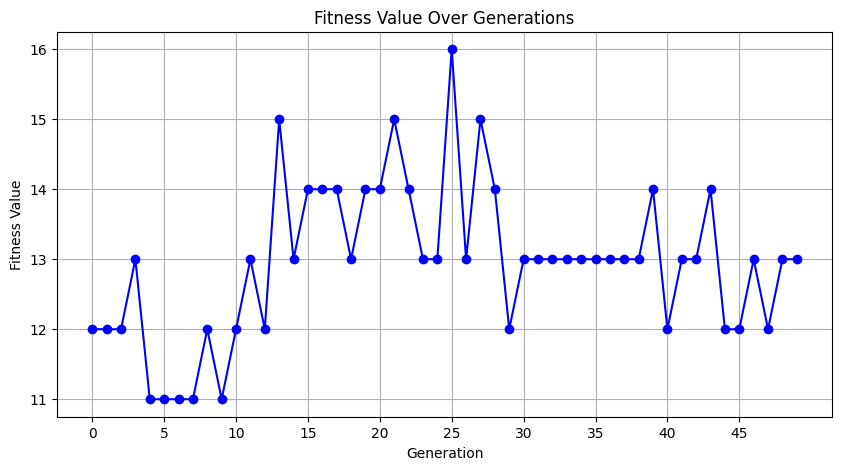

In [34]:
import matplotlib.pyplot as plt

# Generating data for the chart
generations = list(range(GENERATIONS))
fitness_values = [
    11, 11, 11, 11, 12, 12, 12, 15, 13, 13, 13, 13, 16, 14, 14, 13, 12, 13, 11, 12,
    12, 12, 12, 11, 12, 13, 14, 13, 13, 13, 13, 14, 14, 14, 12, 14, 14, 14, 15, 13,
    11, 12, 13, 12, 12, 14, 12, 13, 12, 14
]  # Extracted from the output of each generation

# Plotting the fitness values over generations
plt.figure(figsize=(10, 5))
#plt.plot(generations, fitness_values, marker='o', linestyle='-', color='b')
plt.plot(generations, ali_fitness, marker='o', linestyle='-', color='b')

plt.title("Fitness Value Over Generations")
plt.xlabel("Generation")
plt.ylabel("Fitness Value")
plt.grid(True)
plt.xticks(range(0, GENERATIONS, 5))
plt.yticks(range(min(ali_fitness), max(ali_fitness) + 1))
plt.show()
